<a href="https://colab.research.google.com/github/AbdelrahmanAmr18/Document-Layout-Segmentation-Selected-3-Project/blob/main/document_layout_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U layoutparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
# !pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
# !git clone https://github.com/Layout-Parser/layout-parser.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-1kae9amg/detectron2_d84f089a15c44a71ad01dca1159fb9ae
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-1kae9amg/detectron2_d84f089a15c44a71ad01dca1159fb9ae
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578


In [ ]:
!pip install "layoutparser[ocr]"	
!pip install "layoutparser[layoutmodels]"
!pip install "layoutparser[effdet]"	
!pip install "layoutparser[paddledetection]"	


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd layout-parser/

[Errno 2] No such file or directory: 'layout-parser/'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import  cv2
#  loading an image from the specified file
image = cv2.imread("/content/drive/MyDrive/Test Images /PMC1064108_00002.jpg")
image = image [..., ::-1]

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel(
            config_path ='lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', # In model catalog
            label_map   ={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
color_map = {
'text': 'red',
'title': 'blue',
'list': 'green',
'table': 'purple',
'figure': 'pink',
}

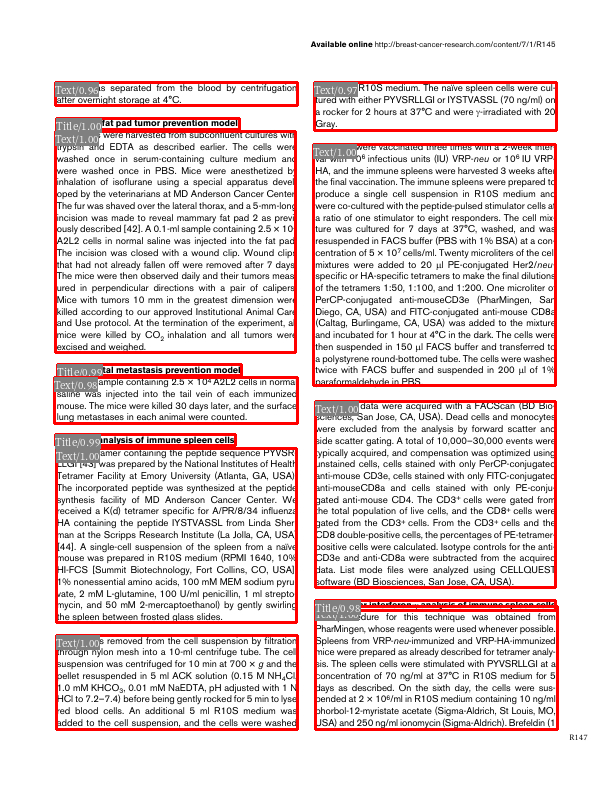

In [ ]:
layout= model.detect(image)
lp.draw_box(image,
[b.set(id=f'{b.type}/{b.score:.2f}') for b in layout],
color_map=color_map,
show_element_id=True, id_font_size=10,
id_text_background_color='grey',
id_text_color='white')

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
text_blocks
Text_blocks,Figure_blocks,Table_blocks,List_blocks,Title_blocks = 0,0,0,0,0

for b in layout:
   if b.type=='Text':
     Text_blocks+=1
   if b.type=='Figure':
     Figure_blocks+=1
   if b.type=='Title':
     Title_blocks+=1
   if b.type=='List':
     List_blocks+=1
   if b.type=='Table':
     Table_blocks+=1

print("number of Text blocks :",Text_blocks)
print("number of Figure blocks :",Figure_blocks)
print("number of Table blocks :",Table_blocks)
print("number of List blocks :",List_blocks)
print("number of Title blocks :",Title_blocks)

number of Text blocks : 10
number of Figure blocks : 0
number of Table blocks : 1
number of List blocks : 0
number of Title blocks : 2


In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])
figure_blocks

Layout(_blocks=[], page_data={})